In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('train_titanic.csv')
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [4]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [6]:
#Print the number of missing values in each column of train and test data
print(x_train.isnull().sum())
print(x_test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            130
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          478
Embarked         1
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             47
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          209
Embarked         1
dtype: int64


In [7]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [8]:
print(df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [9]:
#Print the dimension of train and test data
print(x.shape)
print(y.shape)

(891, 11)
(891,)


In [10]:
#Print the number of missing values in each column of train and test data
print(x.isnull().sum())
print(y.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
0


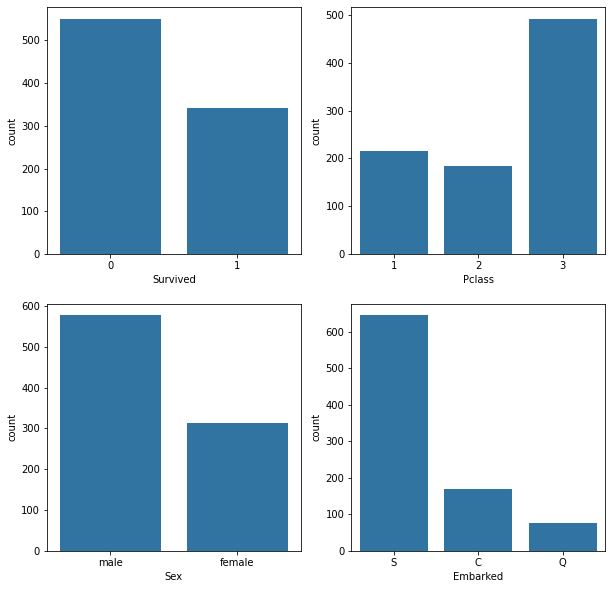

In [11]:
#Barchart of Survived, Pclass, Sex, Embarked
# all combined in one
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.countplot(x="Survived",data=df,ax=ax[0,0])
sns.countplot(x="Pclass",data=df,ax=ax[0,1])
sns.countplot(x="Sex",data=df,ax=ax[1,0])
sns.countplot(x="Embarked",data=df,ax=ax[1,1])
plt.show()


In [12]:

#Impute the missing values in Fare column with median value
df['Fare']=df['Fare'].fillna(df['Fare'].median())
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
#Impute the Age column. It has too many missing values but it may be important.
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data


import numpy as np
print(df["Age"].isnull().sum())
age_mean=df["Age"].mean()
age_std=df["Age"].std()

missing_count=df["Age"].isnull().sum()
random_ages = np.random.normal(loc=age_mean, scale=age_std, size=missing_count)
random_age=[age if age > 0 else age_mean for age in random_ages]
df.loc[df["Age"].isnull(),"Age"]=random_ages
print(df["Age"].isnull().sum())

177
0


In [14]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
df["FamilySize"]=df["Parch"]+df["SibSp"]+1
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  FamilySize  
0      0         A/5 21171   7.2500   NaN        S           2  
1      0          PC 17599  71.2833   C85        C           2  
2      0  STON/O2. 3101282   7.9250   NaN        S           1  
3      0            113803  53.1000  C123        S          

In [17]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False
df["IsAlone"] = df["FamilySize"] == 1

# Check the first few rows to verify
#df[["SibSp", "Parch", "FamilySize", "IsAlone"]].head()
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  FamilySize  IsAlone  
0      0         A/5 21171   7.2500   NaN        S           2    False  
1      0          PC 17599  71.2833   C85        C           2    False  
2      0  STON/O2. 3101282   7.9250   NaN        S           1     True  
3      0            1138

In [20]:
# concat df_categorical with original df

# Select categorical columns to encode
categorical_cols = ['Embarked']  # You can add/remove columns as needed

# Perform one-hot encoding on these columns
df_categorical = pd.get_dummies(df[categorical_cols], drop_first=True)

# Now concatenate the new categorical features with the original dataframe
df = pd.concat([df, df_categorical], axis=1)

# Display updated DataFrame
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Pclass,Sex_male,Embarked_Q,Embarked_S,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,False,3,True,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,False,1,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True,3,False,False,True,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,False,1,False,False,True,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,True,3,True,False,True,False,True


In [32]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 11)
(90, 11)
(801,)
(90,)


In [40]:
# Drop non-numeric and irrelevant columns
df_model = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Ensure all categorical columns are encoded
# If you haven’t done it yet, do:
df_model = pd.get_dummies(df_model, drop_first=True)

# Define input features and target
X = df_model.drop("Survived", axis=1)
y = df_model["Survived"]

# Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# Create the model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7877094972067039

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


Confusion Matrix:
 [[86 19]
 [19 55]]


ValueError: could not convert string to float: 'Goldsmith, Master. Frank John William "Frankie"'